<a href="https://colab.research.google.com/github/RuthMeryC/Data-visualization/blob/main/Proyecto2_caso_automoviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=uVm9VWvC3_A

https://www.kaggle.com/datasets/missionjee/car-sales-report

https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda

In [ ]:
print('sys.executable')
import pandas as pd

sys.executable


In [ ]:
import plotly.express as px
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
color1=['sandybrown', 'darkseagreen','gold','salmon','lightseagreen', 'orange', 'khaki','mediumaquamarine', 'slateblue','coral', 'steelblue','tomato', 'mediumaquamarine','lightgoldenrodyellow', 'lightcoral','slateblue', 'cornflowerblue','khaki', 'navajowhite','indianred', 'teal','mediumslateblue', 'goldenrod','cadetblue', 'orangered','y', 'darksalmon','lemonchiffon', 'mediumpurple','lightsteelblue', 'firebrick']
fuente_label={'family': 'Bahnschrift SemiCondensed', 'color': 'black','size': 8}
fuente_title={'family': 'Bahnschrift SemiCondensed', 'color': 'black','size': 12}

In [ ]:
ruta_archivo = r'D:\Downloads\archive (27)\Car Sales.xlsx - car_data.csv'
df = pd.read_csv(ruta_archivo)
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df=df.rename(columns={'Customer Name': 'Customer_Name', 'Annual Income': 'Annual_Income'})
df['Customer_Name'].value_counts()

Customer_Name
Thomas           92
Emma             90
Lucas            88
Nathan           80
Louis            76
                 ..
Adelin            1
Zakarya           1
Paule             1
Noeline           1
Djamel Epoine     1
Name: count, Length: 3021, dtype: int64

Debido que se cuenta con dato nulo en la caracteristica 'Customer_Name', este se eliminará

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer_Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual_Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Car_id'].duplicated().sum()

0

Revisión de las variables categoricas

In [ ]:
colum_cat=df.select_dtypes(exclude=['int64'])
for colum in colum_cat:
    print(f"Categoria {colum}")
    print(sorted(df[colum].unique()))
    print(                                                         )

Categoria Car_id
['C_CND_000001', 'C_CND_000002', 'C_CND_000003', 'C_CND_000004', 'C_CND_000005', 'C_CND_000006', 'C_CND_000007', 'C_CND_000008', 'C_CND_000009', 'C_CND_000010', 'C_CND_000011', 'C_CND_000012', 'C_CND_000013', 'C_CND_000014', 'C_CND_000015', 'C_CND_000016', 'C_CND_000017', 'C_CND_000018', 'C_CND_000019', 'C_CND_000020', 'C_CND_000021', 'C_CND_000022', 'C_CND_000023', 'C_CND_000024', 'C_CND_000025', 'C_CND_000026', 'C_CND_000027', 'C_CND_000028', 'C_CND_000029', 'C_CND_000030', 'C_CND_000031', 'C_CND_000032', 'C_CND_000033', 'C_CND_000034', 'C_CND_000035', 'C_CND_000036', 'C_CND_000037', 'C_CND_000038', 'C_CND_000039', 'C_CND_000040', 'C_CND_000041', 'C_CND_000042', 'C_CND_000043', 'C_CND_000044', 'C_CND_000045', 'C_CND_000046', 'C_CND_000047', 'C_CND_000048', 'C_CND_000049', 'C_CND_000050', 'C_CND_000051', 'C_CND_000052', 'C_CND_000053', 'C_CND_000054', 'C_CND_000055', 'C_CND_000056', 'C_CND_000057', 'C_CND_000058', 'C_CND_000059', 'C_CND_000060', 'C_CND_000061', 'C_CND

Validamos que no tenemos datos anomalos en las variables categoricas.

La categira 'Date' es de tipo objetc, por lo que se va a cambiar a categoria datetime

In [ ]:
df['Date']=df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

La categoria Engine cuenta con un dato anomalo 'DoubleÂ\xa0Overhead Camshaft'

In [ ]:
df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)
df['Engine'].value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16284\3364726285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft', inplace=True)


Engine
Double Overhead Camshaft    12570
Overhead Camshaft           11335
Name: count, dtype: int64

Revisión de las variables numéricas

Revisamos si existen valor negativos

In [ ]:
colum_num=df.select_dtypes(exclude=['object','datetime64[ns]']).drop(columns=['Phone'])
valor_neg=(colum_num<0).any()
print("Valor negativo:")
print(valor_neg[valor_neg].index)

Valor negativo:
Index([], dtype='object')


Análisis estadistico de las variables numéricas

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,23905,2023-03-01 14:35:12.261033216,2022-01-02 00:00:00,2022-09-20 00:00:00,2023-03-13 00:00:00,2023-09-08 00:00:00,2023-12-31 00:00:00,NaN
Annual_Income,23905.0,830846.595106,10080.0,386000.0,735000.0,1176000.0,11200000.0,720020.794597
Price ($),23905.0,28089.540473,1200.0,18001.0,23000.0,34000.0,85800.0,14788.592495
Phone,23905.0,7497752.9347,6000101.0,6746465.0,7496199.0,8248172.0,8999579.0,867508.047567


Analisis 'Annual_Income': Podemos observar que el ingreso minimo anual es de $10,080.00 y maximo de $11,200,000.00, con una media de $830,846.00 y una mediana de $735,000.00.
La desviacion estandar es de 720,021.00 lo que indica que los ingresos anuales estan dispersos alrededor del promedio de ingresos anuales(existe una mayor variabilidad de los ingresos de las personas que adquirieron un auto).

Análisis 'Price ($)': Podemos observar que el precio minimo de los automoviles es de $1,200.00 y maximo de $85,800.00, con una media de $28,090.00 y una mediana de $23,000.00.
La desviacion estandar es de 14,788.00 lo que indica que los precios estan dispersos alrededor de la media. En promedio los precios se desvian de la media $28,090.00 alrededor de $14,789.00

Análisis estadistico de las variables categoricas

In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
Car_id,23905,23905,C_CND_000001,1
Customer_Name,23905,3021,Thomas,92
Gender,23905,2,Male,18797
Dealer_Name,23905,28,Progressive Shippers Cooperative Association No,1318
Company,23905,30,Chevrolet,1819
Model,23905,154,Diamante,418
Engine,23905,2,Double Overhead Camshaft,12570
Transmission,23905,2,Auto,12570
Color,23905,3,Pale White,11255
Dealer_No,23905,7,85257-3102,3814


Se observa que el mayor numero de compradores son hombres.
La compañia que tuvo mayor venta es Chevrolet.
El modelo mas vendido es Diamante.
Austin es la región donde se compró más automoviles.

Visualización de los datos

Visualización de Gráficos - venta 2022 y 2023

In [ ]:
dfv1=df.copy()
dfv1['Year_Month']=dfv1['Date'].dt.strftime('%Y-%m')
gb1=dfv1.groupby('Year_Month')[['Price ($)']].sum().reset_index()
gb1

,Year_Month,Price ($)
0,2022-01,8931920
1,2022-02,8795365
2,2022-03,19502059
3,2022-04,22748867
4,2022-05,20608086
5,2022-06,19604211
6,2022-07,19935002
7,2022-08,23631362
8,2022-09,42218216
9,2022-10,23991509


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


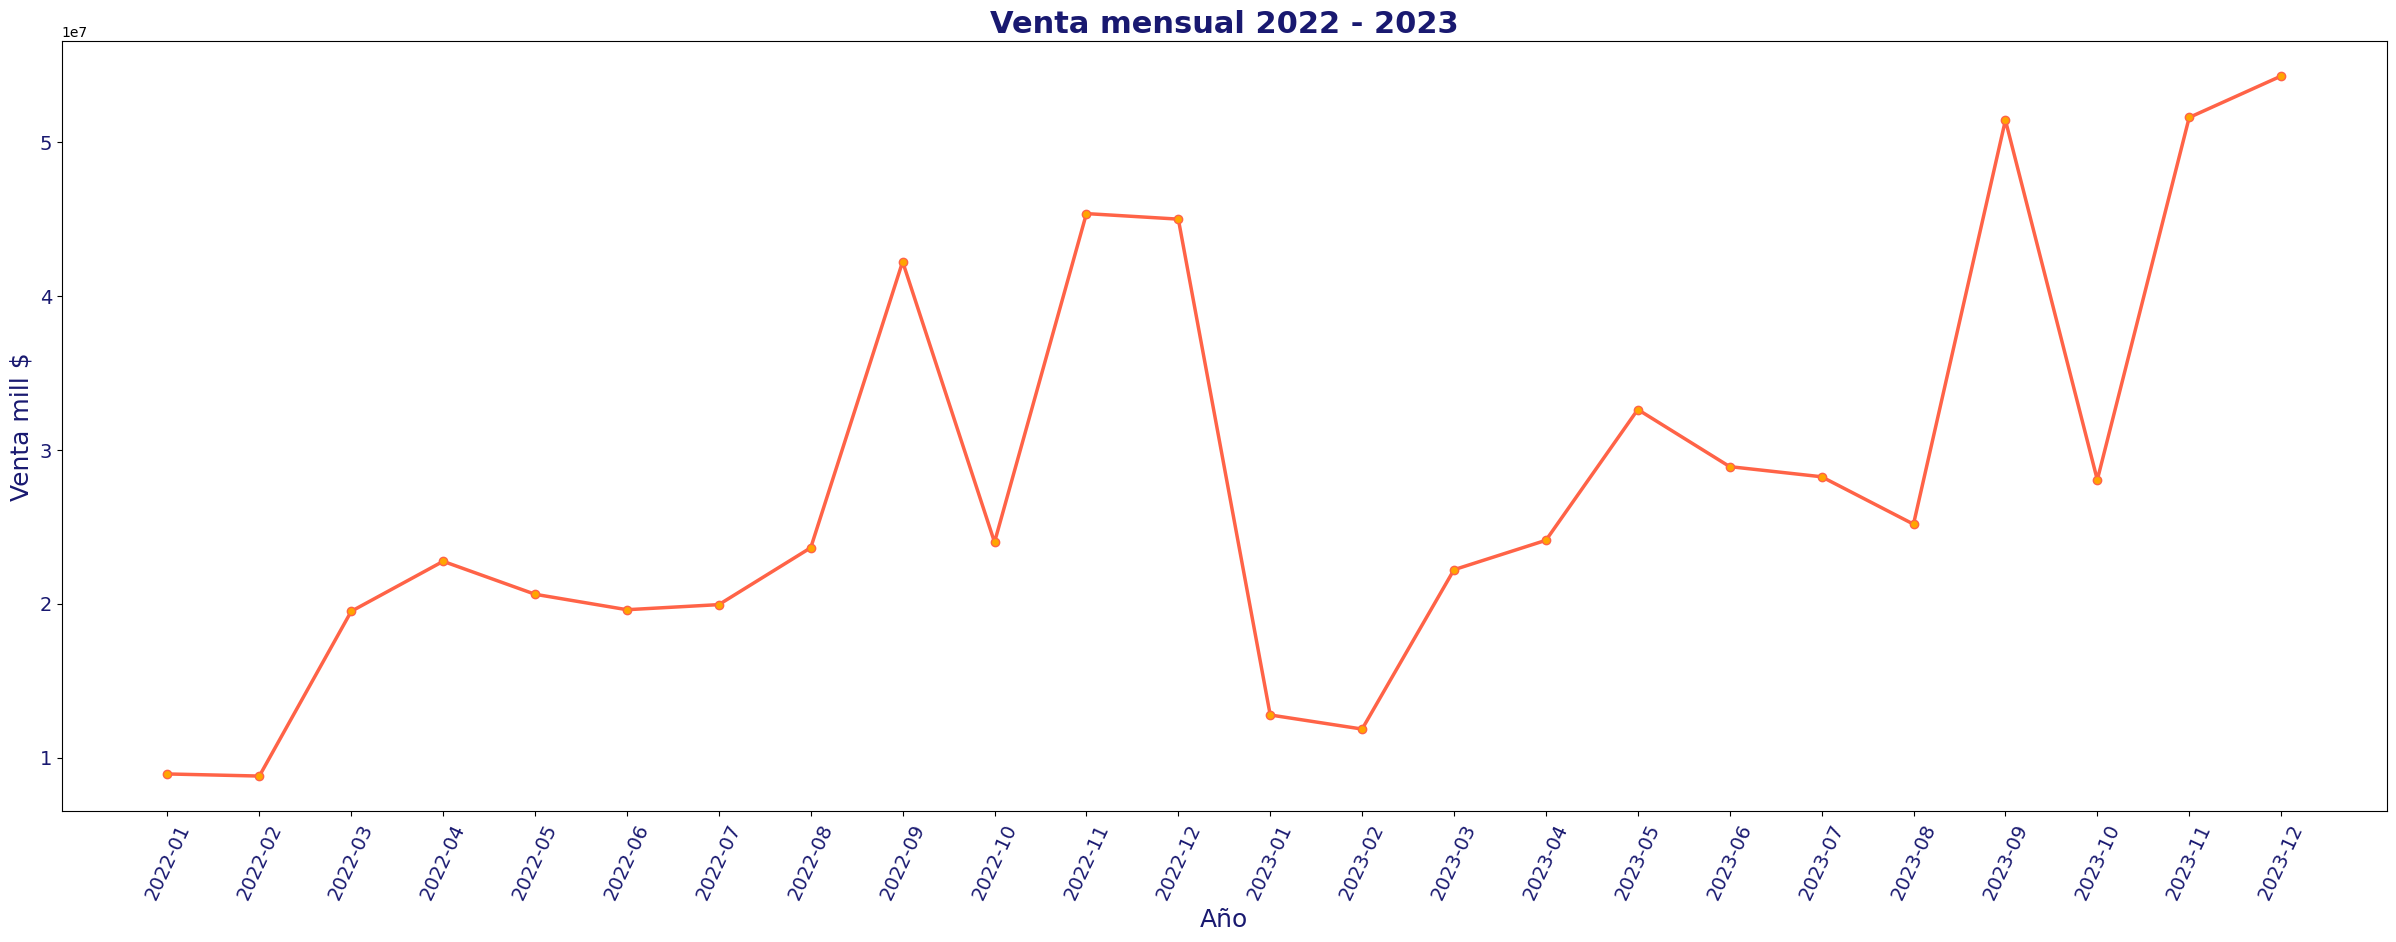

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(gb1['Year_Month'],gb1['Price ($)'], color="tomato", marker='o',  markerfacecolor="orange",   lw=2.5,  ms=6)

#for val , value in enumerate(gb1['Price ($)']):
  #plt.text(gb1['Year_Month'][val],gb1['Price ($)'][val], f"{round(value,0)}", ha='right', va='bottom')

plt.ylabel("Venta mill $", fontdict=fuente_label, fontsize=18, color='midnightblue')
plt.xlabel("Año", fontdict=fuente_label, fontsize=18, color='midnightblue')
plt.xticks(fontsize=14, color='midnightblue', rotation=65)
plt.yticks(fontsize=14, color='midnightblue')
plt.title("Venta mensual 2022 - 2023", color='midnightblue', fontsize=22, fontweight='bold')

plt.show()

Gráfico 1: se observa que el año 2022 en el mes de Septiembre, Noviembre y Diciembre se tuvo una mayor demanda con respecto a los otros meses de este año. Sin embargo, a inicios del año 2023 las ventas cayeron,recupernadoce a partir del mes de Febrero, obteniendo la una mayor demanda en el mes de Septiembre, Noviembre y Diciembre.

Visualización de variables cualitativas

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16284\5508713.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.barplot(ax=axes[i, 0], x=df[colum].value_counts().index, y=df[colum].value_counts().values, palette='Spectral')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16284\5508713.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=65,color='midnightblue')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16284\5508713.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bar.set_yticklabels(ax_bar.get_yticklabels(), color='midnightblue')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16284\5508713.py:8: FutureWarn

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

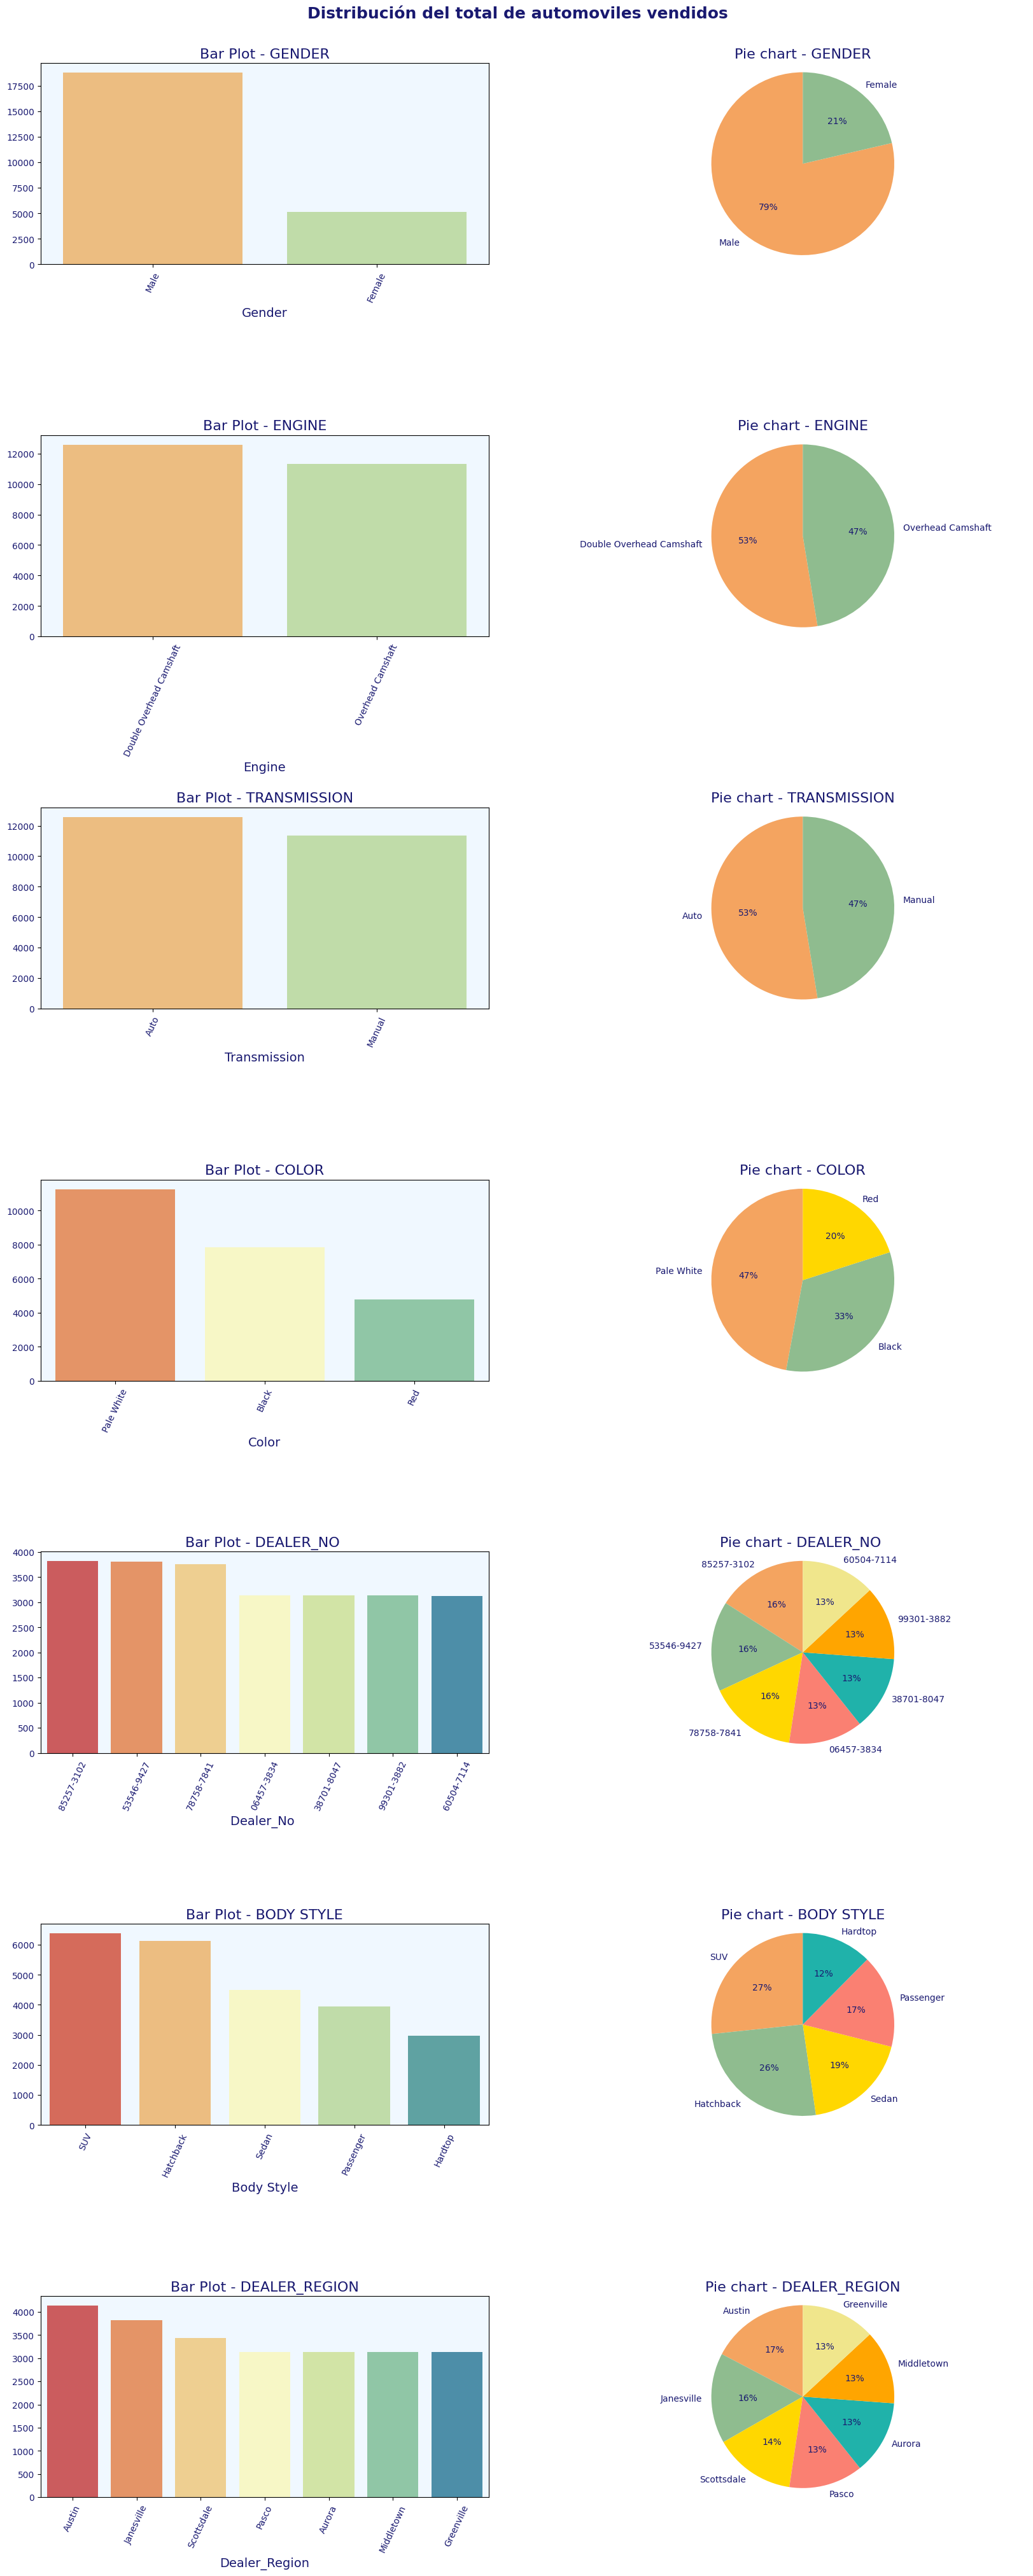

In [ ]:
df_cuanl=df.select_dtypes(include=['object']).columns.drop(['Car_id','Customer_Name','Dealer_Name','Model','Company'])
plt.rcParams['axes.facecolor']='aliceblue'
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 45), sharex=False)
fig.suptitle('Distribución del total de automoviles vendidos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.96, hspace=0.85, wspace=0.2)

for i, colum in enumerate(df_cuanl):
    ax_bar = sns.barplot(ax=axes[i, 0], x=df[colum].value_counts().index, y=df[colum].value_counts().values, palette='Spectral')
    ax_bar.set_title(f'Bar Plot - {colum.upper()}', fontdict=fuente_title, fontsize=16, color='midnightblue')
    ax_bar.set_xlabel(colum, fontdict=fuente_label, fontsize=14, color='midnightblue')
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=65,color='midnightblue')
    ax_bar.set_yticklabels(ax_bar.get_yticklabels(), color='midnightblue')

    ax_pie=axes[i, 1]
    value_counts=df[colum].value_counts()
    ax_pie.pie(value_counts.values, labels=value_counts.index, autopct='%1.0f%%', textprops=dict(color="midnightblue"), startangle=90, colors=color1)
    ax_pie.set_title(f'Pie chart - {colum.upper()}', fontdict=fuente_title, fontsize=16, color="midnightblue")
    ax_pie.axis('equal')


Gráfico 2: se observa que del total de número de automoviles vendidos, el 79 % que los adquirieron, fueron hombres y el 21% mujeres.

Seleccionamos las 15 compañias con mayor número de automoviles vendidos

In [ ]:
df1=df.copy()
df1['TOTAL_COUNT']=1
df1=df1.groupby('Company')[['TOTAL_COUNT']].count()
df4=df1.sort_values(by=['TOTAL_COUNT'], ascending=False)
df4=df4.head(15)

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


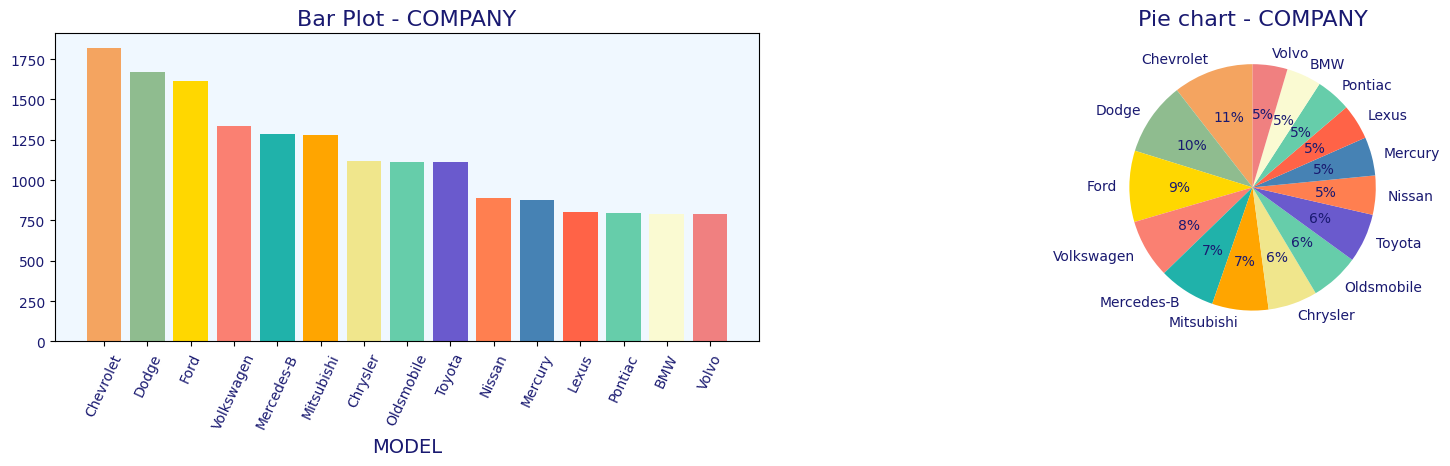

In [ ]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
plt.bar(df4.index, df4['TOTAL_COUNT'], color=color1)
plt.title('Bar Plot - COMPANY', fontdict=fuente_title, fontsize=16, color='midnightblue')
plt.xlabel('MODEL', fontdict=fuente_label, fontsize=14, color='midnightblue')
plt.xticks(rotation=65,color='midnightblue')
plt.yticks(color='midnightblue')

plt.subplot(1,2,2)
plt.pie(df4['TOTAL_COUNT'].values, labels=df4.index, autopct='%1.0f%%', textprops=dict(color="midnightblue"), startangle=90, colors=color1)
plt.title('Pie chart - COMPANY', fontdict=fuente_title, fontsize=16, color="midnightblue")
plt.show()

Seleccionamos los 10 modelos más vendidos

https://matplotlib.org/stable/users/explain/axes/arranging_axes.html#sphx-glr-users-explain-axes-arranging-axes-py

In [ ]:
df2=df.copy()
df2['TOTAL_COUNT']=1
df2=df2.groupby('Model')[['TOTAL_COUNT']].count()
df3=df2.sort_values(by=['TOTAL_COUNT'], ascending=False)
df3=df3.head(10)

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


findfont: Font family 'Bahnschrift SemiCondensed' not found.


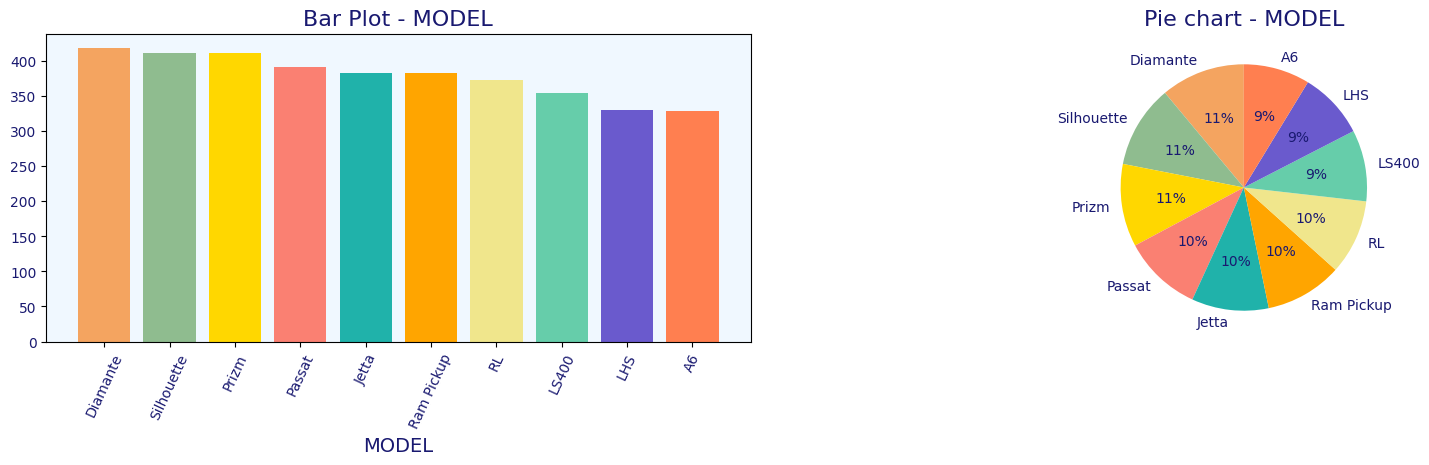

In [ ]:
plt.figure(figsize=[20,4])

plt.subplot(1,2,1)
plt.bar(df3.index, df3['TOTAL_COUNT'], color=color1)
plt.title('Bar Plot - MODEL', fontdict=fuente_title, fontsize=16, color='midnightblue')
plt.xlabel('MODEL', fontdict=fuente_label, fontsize=14, color='midnightblue')
plt.xticks(rotation=65,color='midnightblue')
plt.yticks(color='midnightblue')

plt.subplot(1,2,2)
plt.pie(df3['TOTAL_COUNT'].values, labels=df3.index, autopct='%1.0f%%', textprops=dict(color="midnightblue"), startangle=90, colors=color1)
plt.title('Pie chart - MODEL', fontdict=fuente_title, fontsize=16, color="midnightblue")
plt.show()

Visualización de variables cuantitativas

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")

Medidas de tendencia central:promedio, mediana y moda.

In [ ]:
BLUE, BOLD, RESET = '\033[94m', '\033[1m','\033[0m'

In [ ]:
print("Medidas de Tendencia Central para 'Ingreso anual' y 'Precio':\n")
print(f"Promedio de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].mean()}{RESET}")
print(f"Mediana de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].median()}{RESET}")
print(f"Moda de ingreso anual es: {BLUE}{BOLD}{df['Annual_Income'].mode()}{RESET}\n")

print(f"Promedio del precio: {BLUE}{BOLD}{df['Price ($)'].mean()}{RESET}")
print(f"Mediana del precio: {BLUE}{BOLD}{df['Price ($)'].median()}{RESET}")
print(f"Moda del precio: {BLUE}{BOLD}{df['Price ($)'].mode()}{RESET}")

Medidas de Tendencia Central para 'Ingreso anual' y 'Precio':

Promedio de ingreso anual es: 830846.5951056264
Mediana de ingreso anual es: 735000.0
Moda de ingreso anual es: 0    13500
Name: Annual_Income, dtype: int64

Promedio del precio: 28089.540472704455
Mediana del precio: 23000.0
Moda del precio: 0    22000
Name: Price ($), dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

Medidas de dispersión:varianza, desviación estandar y rango

In [ ]:
print("\nMedidas de Dispersión para 'Ingreso anual' y 'Precio:\n")
print(f"Varianza del ingreso anual: {BLUE}{BOLD}{df['Annual_Income'].var()}{RESET}")
print(f"Desviación Estándar del ingreso anual:{BLUE}{BOLD}{df['Annual_Income'].std()}{RESET}")
print(f"Rango del ingreso anual: {BLUE}{BOLD}{df['Annual_Income'].max() - df['Annual_Income'].min()}{RESET}\n")

print(f"Varianza del precio: {BLUE}{BOLD}{df['Price ($)'].var()}{RESET}")
print(f"Desviación Estándar del precio: {BLUE}{BOLD}{df['Price ($)'].std()}{RESET}")
print(f"Rango del precio: {BLUE}{BOLD}{df['Price ($)'].max() - df['Price ($)'].min()}{RESET}")


Medidas de Dispersión para 'Ingreso anual' y 'Precio:

Varianza del ingreso anual: 518429944651.5913
Desviación Estándar del ingreso anual:720020.79459665
Rango del ingreso anual: 11189920

Varianza del precio: 218702467.97377402
Desviación Estándar del precio: 14788.592494682312
Rango del precio: 84600


https://github.com/jeedorsa/Data-Analytics-CD/blob/main/5-Analisis%20Estadistico/5%20-Analisis%20Estadistico.ipynb

El dato mas relevante en el análisis de las medidas de dispersion es que se tiene una varianza del ingreso anual muy alta, lo que los datos estan muy dispersos alrededor de la media. Esto pisiblemente se deba a que estamos comparando el ingreso anual de los clientes de diferentes regiones. Se hará el análisis de los ingresos por region lineas abajo.

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

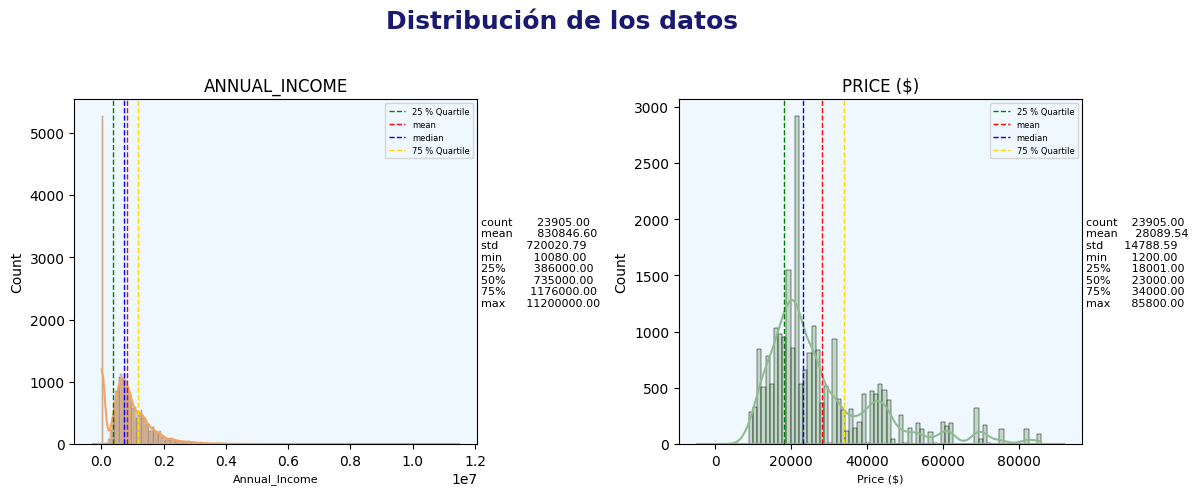

In [ ]:
df_cuant=df.select_dtypes(include=['int64']).columns.drop('Phone')
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=(13,5))
fig.suptitle('Distribución de los datos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, colum in enumerate(df_cuant):
    ax=fig.add_subplot(1,2,i+1)
    sns.histplot(df[colum], color=color1[i], kde=True, ax=ax)
    sns.kdeplot(df[colum], color=color1[i], ax=ax)
    ax.axvline(df[colum].quantile(q=0.25),color='green', linestyle='--', label='25 % Quartile', lw=1)
    ax.axvline(df[colum].mean(),color='red', linestyle='--', label='mean', lw=1)
    ax.axvline(df[colum].median(),color='blue', linestyle='--', label='median', lw=1)
    ax.axvline(df[colum].quantile(q=0.75),color='gold', linestyle='--', label='75 % Quartile', lw=1)
    datos_descriptivos=[line for line in str(df[colum].describe().round(2)).split('\n')if 'Name' not in line and 'dtype' not in line]
    datos_texto='\n'.join(datos_descriptivos)
    ax.annotate(datos_texto, xy=(1.01,0.4), xycoords='axes fraction', fontsize=8)
    ax.set_xlabel(f'{colum}', fontdict=fuente_label)
    ax.set_title(f'{colum.upper()}', fontdict=fuente_title)
    ax.legend(fontsize=6)


Gráfico 1: Se observa una distribución asimétrica positiva de los ingresos anuales de los clientes, lo que indica que los datos se encuentran sesgados hacia la izquierda. El 75% de los clientes tienen ingresos anuales por debajo de $1'176,000.00, y por encima del 75%, los clientes tienen un ingreso anual mayor hasta los $11'200,000.00

Gráfico 2: Se observa una distribución asimétrica positiva de los precios del automovil, lo que indica que los datos se encuentran sesgados hacia la izquierda. El precio promedio de los autos es de $28,090.00. En el histograma tambien se observa que el mayor numero de autos vendidos tiene una precio alrededor de los $23,000.00

Boxplot de las variables ingreso anual y precio

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

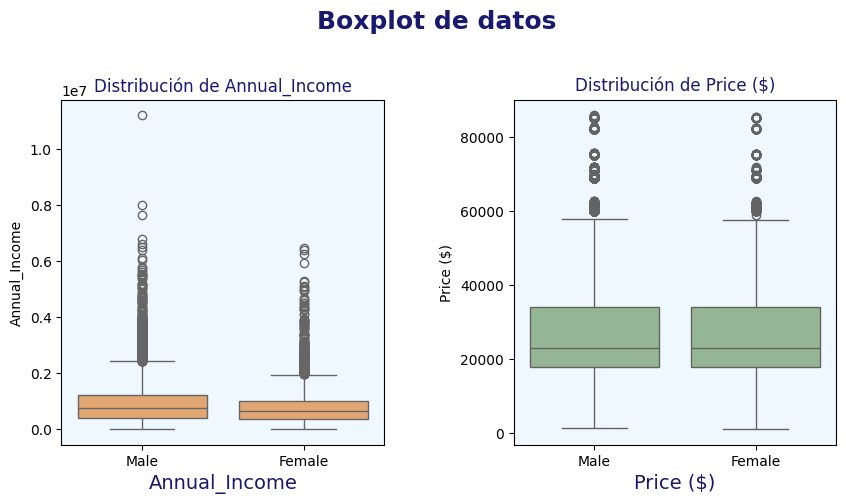

In [ ]:
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=[10,5])
fig.suptitle('Boxplot de datos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, colum in enumerate(df_cuant):
    ax1=fig.add_subplot(1,2,i+1)
    ax1=sns.boxplot(x='Gender', y=colum, data=df, color=color1[i])
    ax1.set_title(f'Distribución de {colum}', fontdict=fuente_title, color='midnightblue')
    ax1.set_xlabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=14)

Gráfico 3:se observa que el que el ingreso anual de hombres es mayor al ingreso anual de las mujeres. Asimísmo, existen valores outlaires más altos en los ingresos de los hombres que en las mujeres.
Existe aproximadamente el mismo número de personas, con ingresos de $386,000.00 (Q1) a $735,000.00(mediana) y de $735,000.00 a $1'176,000.00(Q3) para ambos sexos.

Gráfico 4:no se observa grandes diferencia en el precio de los automoviles que adquierieron entre los hombres y las mujeres. Sin embargo, en ambos casos existen valores outliers.
Existe menor número de personas que adquierieron un auto con el precio de $18,001.00 (Q1) a $23,000.00(mediana) y un precio mayor de $23,000.00 a $34,000.00(Q3) para ambos sexos.

Boxplot del ingreso anual y precios por región

findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'B

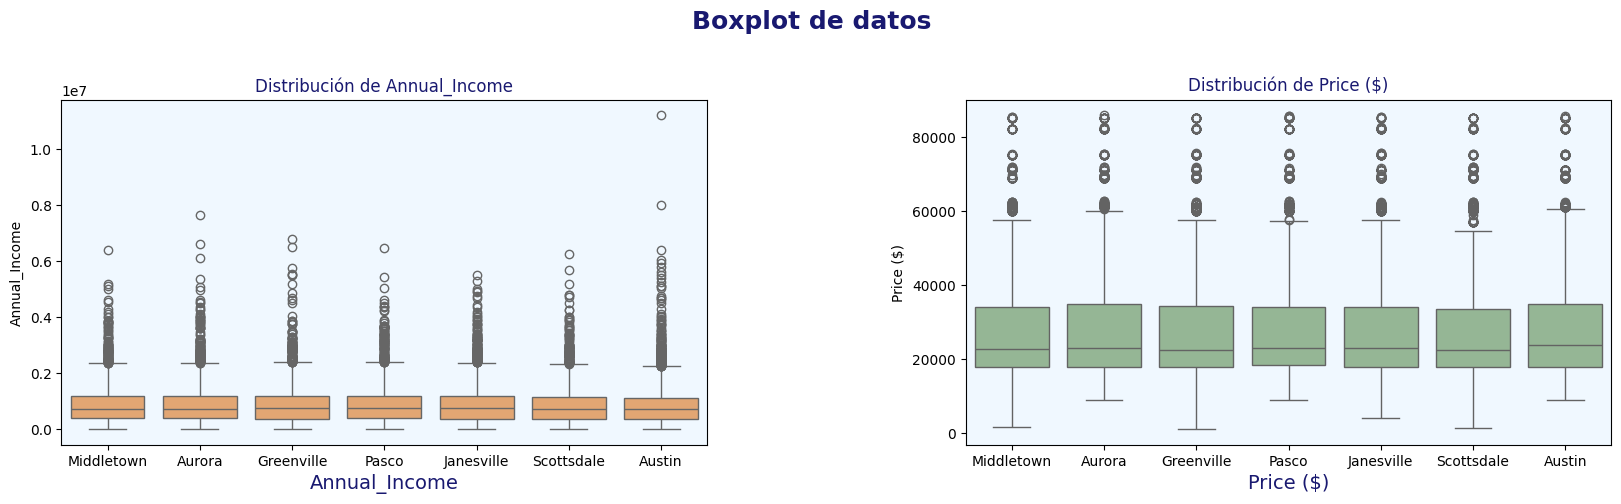

In [ ]:
plt.rcParams['axes.facecolor']='aliceblue'
fig=plt.figure(figsize=[20,5])
fig.suptitle('Boxplot de datos', color='midnightblue', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.80)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, colum in enumerate(df_cuant):
    ax1=fig.add_subplot(1,2,i+1)
    ax1=sns.boxplot(x='Dealer_Region', y=colum, data=df, color=color1[i])
    ax1.set_title(f'Distribución de {colum}', fontdict=fuente_title, color='midnightblue')
    ax1.set_xlabel(f'{colum}', fontdict=fuente_label, color='midnightblue', fontsize=14)

Grafico :se observa que los ingresos anuales por región, cuenta con valorer outliers en cada región, siendo Austin con valores outliers más altos.
Grafico :se observa que los precios de los automoviles en cada region cuenta con valores outliers, siendo Austin, la region con precios levemente más altos que en las otras regiones.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

Matriz de correlaciones

In [ ]:
colum_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Annual_Income  23905 non-null  int64
 1   Price ($)      23905 non-null  int64
dtypes: int64(2)
memory usage: 560.3 KB


findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.
findfont: Font family 'Bahnschrift SemiCondensed' not found.


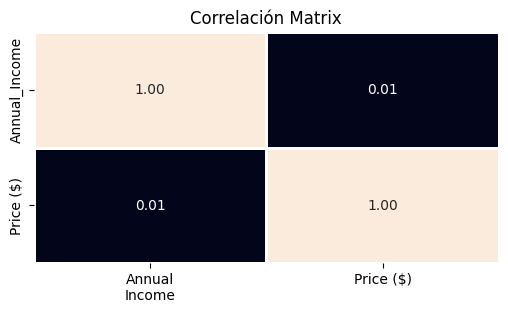

In [ ]:
correlacion = colum_num.corr(method='pearson')
fig=plt.subplots(figsize=(6,3))
ax=sns.heatmap(correlacion, annot=True, fmt='.2f', cbar=None, linewidths=0.9)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title('Correlación Matrix', fontdict=fuente_title)
plt.show()

Gráfico #: No existe relacion entre las variables ingreso anual de los clientes y el precio del automovil que adquirieron.

Prueba de hipótesis y distribuciones

Histograma diferenciado y agrupado

Text(0.5, 1.0, 'Distribución del precio segun género')

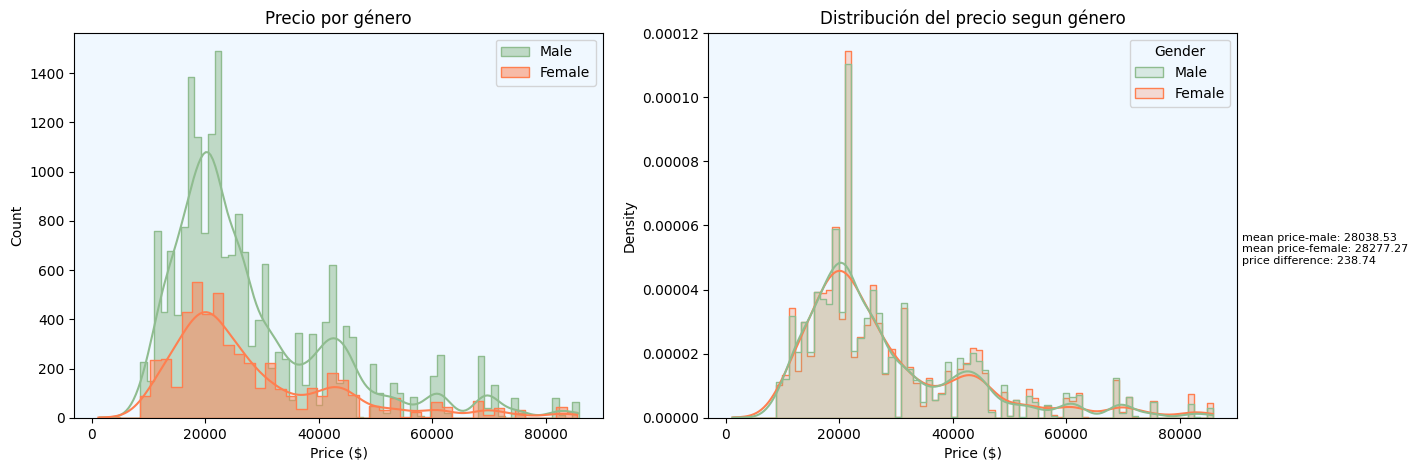

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Gender'] == 'Male']["Price ($)"], color='darkseagreen',kde=True, common_norm=False, element='step', label='Male' )
sns.histplot(df[df['Gender'] == 'Female']["Price ($)"], color='coral',kde=True, common_norm=False, element='step', label='Female')
plt.title('Precio por género')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_genderm = df[df['Gender'] == 'Male']["Price ($)"].mean()
mean_price_genderf = df[df['Gender'] == 'Female']["Price ($)"].mean()

diff = mean_price_genderf-mean_price_genderm

sns.histplot(df, x='Price ($)', hue='Gender', element='step', stat='density', common_norm=False, kde=True, palette={'Male': 'darkseagreen', 'Female': 'coral'})
plt.annotate(f'mean price-male: {mean_price_genderm:.2f}\nmean price-female: {mean_price_genderf:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio segun género')

Gráfico : se observa que, tanto hombres como mujeres han adquirido automoviles con precios similares, sin embargo el numero de compradores hombres es mayor al numero de compradores mujeres.El precio alrededor de los $20,000.00 tiene mayor número de compradores hombres, superando una frecuencia de 1400.

Gráfico :el precio de automoviles comprados, tiene un comportamiento similar en ambos generos (male, female).

H0=     no existen asociación  entre el género y el precio de automoviles que adquirieron.

Valor de significancia=0.05

se realiza un análisis para saber si los datos tienen una distribución normal, para ello primero hacemos la prueba de Shapiro-Wilk.

In [ ]:
from scipy.stats import shapiro

In [ ]:
grupo1 = df[df['Gender'] == 'Male']['Price ($)']
grupo2 = df[df['Gender'] == 'Female']['Price ($)']

stat_grupo1, p_valor_grupo1=shapiro(grupo1)
print(f'El grupo1 - estadistico w: {stat_grupo1}, valor p: {p_valor_grupo1}')

stat_grupo2, p_valor_grupo2=shapiro(grupo2)
print(f'El grupo2 - estadistico w: {stat_grupo2}, valor p: {p_valor_grupo2}')

El grupo1 - estadistico w: 0.8626948262201803, valor p: 1.6860319688199002e-82
El grupo2 - estadistico w: 0.8526785747125583, valor p: 2.2857114571027146e-56


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18797.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5108.
  res = hypotest_fun_out(*samples, **kwds)


El valor p es menor que 0.05, por lo tanto rechazamos la H0 de que los datos tienen una distribucion normal. Ya que los datos no vienen de una distribucion normal.

Para la prueba de hipótesis, se utilizará la Prueba de chi-cuadrado

In [ ]:
from scipy.stats import chi2_contingency

Crear una tabla de contingencia

In [ ]:
tabla_contingencia = pd.crosstab(df['Gender'], df['Price ($)'])

Prueba de hipotes chi-cuadrado

https://www.ibm.com/docs/es/spss-statistics/saas?topic=test-chi-square-options

In [ ]:
chi2, p_val, grados_libertad, _ = chi2_contingency(tabla_contingencia)
print(f"Estadístico chi2: {chi2}, Valor p: {p_val}, Grados de libertad: {grados_libertad}")

Estadístico chi2: 833.9836045914184, Valor p: 0.798266326049301, Grados de libertad: 869


El p-valor en mayor que 0.05, por lo tanto podemos concluir que no hay una asociación significativa entre el género y los ingresos.

Text(0.5, 1.0, 'Distribución del precio por tipo de transmisión')

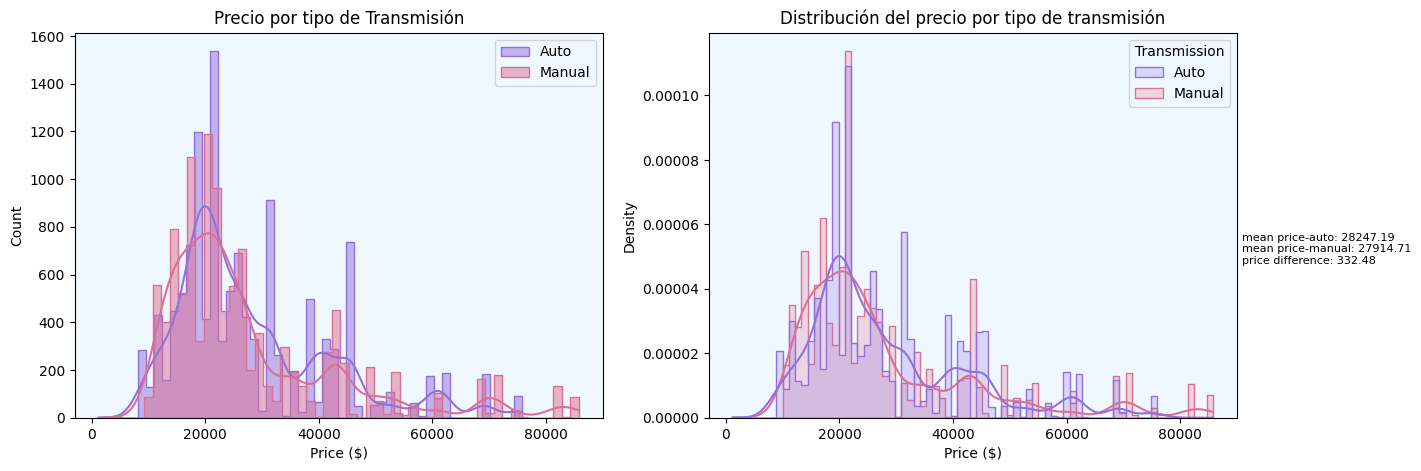

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Transmission'] == 'Auto']["Price ($)"], color='mediumpurple',kde=True, common_norm=False, element='step', label='Auto' )
sns.histplot(df[df['Transmission'] == 'Manual']["Price ($)"], color='palevioletred',kde=True, common_norm=False, element='step', label='Manual')
plt.title('Precio por tipo de Transmisión')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_transa = df[df['Transmission'] == 'Auto']["Price ($)"].mean()
mean_price_transm= df[df['Transmission'] == 'Manual']["Price ($)"].mean()

diff = mean_price_transa-mean_price_transm

sns.histplot(df, x='Price ($)', hue='Transmission', element='step', stat='density', common_norm=False, kde=True, palette={'Auto':'mediumpurple', 'Manual':'palevioletred'})
plt.annotate(f'mean price-auto: {mean_price_transa:.2f}\nmean price-manual: {mean_price_transm:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio por tipo de transmisión')


Gráfico :Se observa que la distribución de precios de los automóviles con transmisión automática que fueron adquiridos por los clientes, tiende a concentrarse en el rango de precios alrededor de los $21,000. Por otro lado, la distribución de precios de los automóviles con transmisión manual muestra una mayor dispersión, con un pico en un rango de precios ligeramente más bajo, alrededor de los $20,000.
Se observa que se vendió algunos automóviles con transmisión manual que tienen precios más altos en comparación con los automoviles con transmisión automatica.

Grafico : Al comparar las distribuciones de precios de los automóviles con transmisión automática y manual que se vendieron, no se nota grandes diferencias en la ubicación de los picos y la dispersión de los datos.
La distribución de precios de los automóviles con transmisión automática muestra un sesgo hacia precios más altos, con un pico muy pronunciado.
Asimísmo, la distribución de precios de los automóviles con transmisión manual muestra un pico levemente más pronunciado en un rango de precios similar al rango de precios de automóviles con transmisión automática.

Text(0.5, 1.0, 'Distribución del precio segun ingeniria')

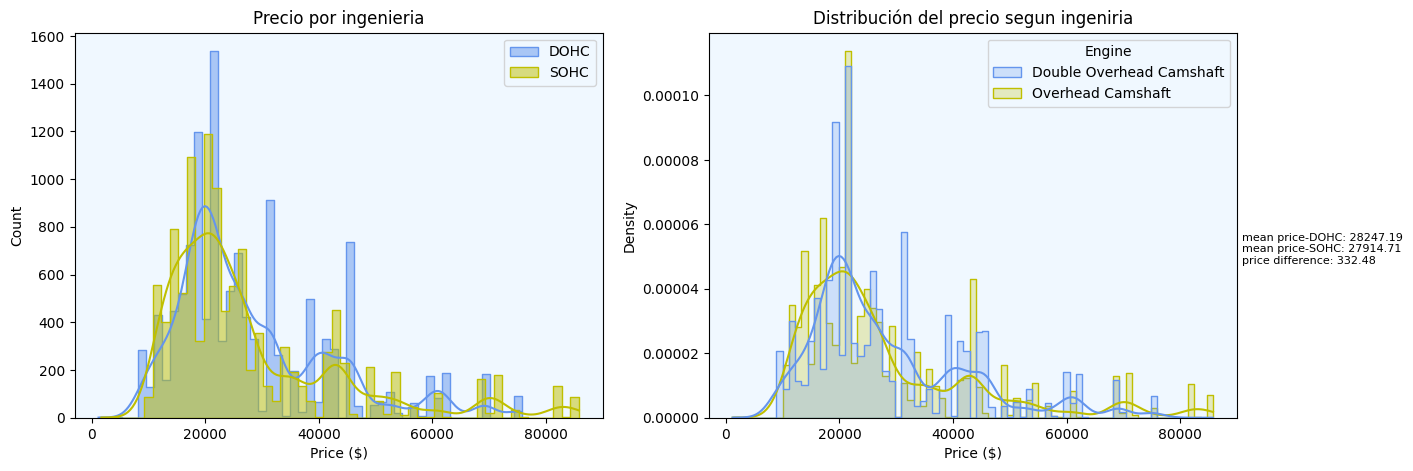

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Engine'] == 'Double Overhead Camshaft']["Price ($)"], color='cornflowerblue',kde=True, common_norm=False, element='step', label='DOHC' )
sns.histplot(df[df['Engine'] == 'Overhead Camshaft']["Price ($)"], color='y',kde=True, common_norm=False, element='step', label='SOHC')
plt.title('Precio por ingenieria')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_ingdohc = df[df['Engine'] == 'Double Overhead Camshaft']["Price ($)"].mean()
mean_price_ingsohc = df[df['Engine'] == 'Overhead Camshaft']["Price ($)"].mean()

diff = mean_price_ingdohc-mean_price_ingsohc

sns.histplot(df, x='Price ($)', hue='Engine', element='step', stat='density', common_norm=False, kde=True, palette={'Double Overhead Camshaft':'cornflowerblue', 'Overhead Camshaft':'y'})

plt.annotate(f'mean price-DOHC: {mean_price_ingdohc:.2f}\nmean price-SOHC: {mean_price_ingsohc:.2f}\nprice difference: {diff:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')

plt.title('Distribución del precio segun ingeniria')


Text(0.5, 1.0, 'Distribución del precio segun Región')

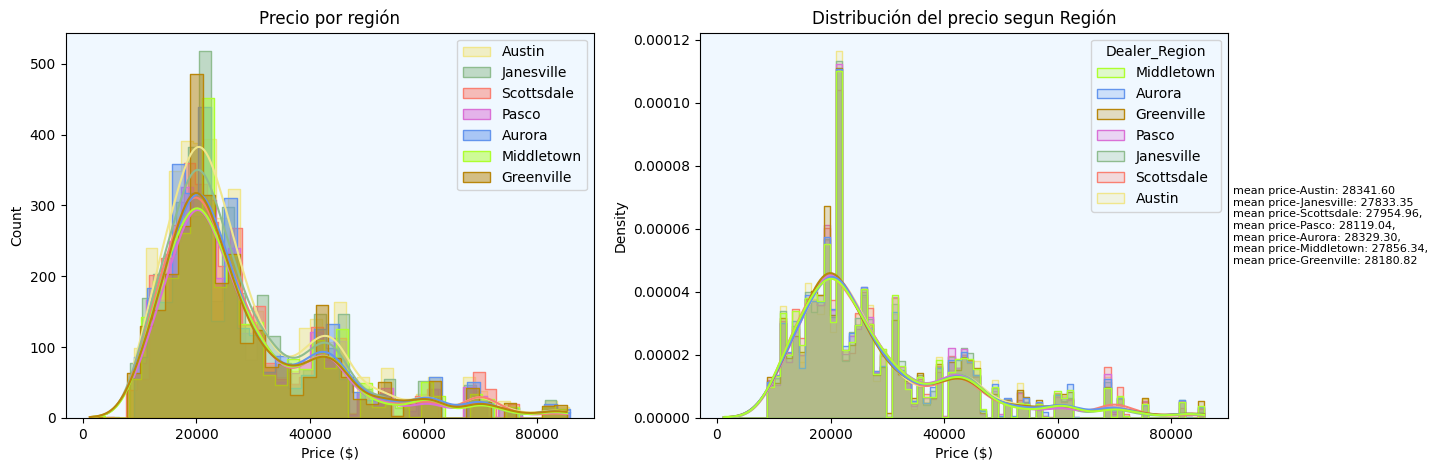

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)

sns.histplot(df[df['Dealer_Region'] == 'Austin']["Price ($)"], color='khaki',kde=True, common_norm=False, element='step', label='Austin' )
sns.histplot(df[df['Dealer_Region'] == 'Janesville']["Price ($)"], color='darkseagreen',kde=True, common_norm=False, element='step', label='Janesville')
sns.histplot(df[df['Dealer_Region'] == 'Scottsdale']["Price ($)"], color='salmon',kde=True, common_norm=False, element='step', label='Scottsdale')
sns.histplot(df[df['Dealer_Region'] == 'Pasco']["Price ($)"], color='orchid',kde=True, common_norm=False, element='step', label='Pasco')
sns.histplot(df[df['Dealer_Region'] == 'Aurora']["Price ($)"], color='cornflowerblue',kde=True, common_norm=False, element='step', label='Aurora')
sns.histplot(df[df['Dealer_Region'] == 'Middletown']["Price ($)"], color='greenyellow',kde=True, common_norm=False, element='step', label='Middletown')
sns.histplot(df[df['Dealer_Region'] == 'Greenville']["Price ($)"], color='darkgoldenrod',kde=True, common_norm=False, element='step', label='Greenville')

plt.title('Precio por región')
plt.legend()

plt.subplot(1, 2, 2)

mean_price_da = df[df['Dealer_Region'] == 'Austin']["Price ($)"].mean()
mean_price_dj = df[df['Dealer_Region'] == 'Janesville']["Price ($)"].mean()
mean_price_ds = df[df['Dealer_Region'] == 'Scottsdale']["Price ($)"].mean()
mean_price_dp = df[df['Dealer_Region'] == 'Pasco']["Price ($)"].mean()
mean_price_dau = df[df['Dealer_Region'] == 'Aurora']["Price ($)"].mean()
mean_price_dm = df[df['Dealer_Region'] == 'Middletown']["Price ($)"].mean()
mean_price_dg = df[df['Dealer_Region'] == 'Greenville']["Price ($)"].mean()


sns.histplot(df, x='Price ($)', hue='Dealer_Region', element='step', stat='density', common_norm=False, kde=True, palette={'Austin': 'khaki', 'Janesville': 'darkseagreen','Scottsdale':'salmon', 'Pasco':'orchid', 'Aurora':'cornflowerblue', 'Middletown':'greenyellow', 'Greenville':'darkgoldenrod'})
plt.annotate(f'mean price-Austin: {mean_price_da:.2f}\nmean price-Janesville: {mean_price_dj:.2f}\nmean price-Scottsdale: {mean_price_ds:.2f},\nmean price-Pasco: {mean_price_dp:.2f},\nmean price-Aurora: {mean_price_dau:.2f},\nmean price-Middletown: {mean_price_dm:.2f},\nmean price-Greenville: {mean_price_dg:.2f}', xy=(1.01,0.4), xycoords='axes fraction', fontsize=8, color='black')
plt.title('Distribución del precio segun Región')

Prueba de hipótesis

valor de significancia = 0.05

H0= no existen diferencias significativas entre el género y los precios de autos que adquirieron.

H0= no existen diferencias significativas entre la transmisión de los automoviles y el precio.

H0= no existen diferencias significativas entre la ingenieria de los automoviles y el precio.

H0= no existen diferencias significativas entre las regiones del distribuidor y los precios de los automoviles.

H0= no existen diferencias significativas entre el ingreso anual de los clientes por región.

H0= no existen diferencias significativas entre el ingreso anual de los clientes y el precio del automovil que adquirieron.

In [ ]:
grupo1 = df[df['Gender'] == 'Male']['Price ($)']
grupo2 = df[df['Gender'] == 'Female']['Price ($)']

t_stat, p_val = stats.ttest_ind(grupo1, grupo2)
print(f"Estadístico t: {t_stat}, Valor p: {p_val}")

Estadístico t: -1.0231063371981732, Valor p: 0.30626792500540334


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Car_id         23905 non-null  object        
 1   Date           23905 non-null  datetime64[ns]
 2   Customer_Name  23905 non-null  object        
 3   Gender         23905 non-null  object        
 4   Annual_Income  23905 non-null  int64         
 5   Dealer_Name    23905 non-null  object        
 6   Company        23905 non-null  object        
 7   Model          23905 non-null  object        
 8   Engine         23905 non-null  object        
 9   Transmission   23905 non-null  object        
 10  Color          23905 non-null  object        
 11  Price ($)      23905 non-null  int64         
 12  Dealer_No      23905 non-null  object        
 13  Body Style     23905 non-null  object        
 14  Phone          23905 non-null  int64         
 15  Dealer_Region  23905 non

In [ ]:
df['Dealer_Region'].value_counts()

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Middletown    3128
Greenville    3128
Name: count, dtype: int64

https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda/notebook
https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda/notebook

In [ ]:
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
